In [1]:
import pandas
pd = pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LinearRegression

In [2]:
pd.options.display.max_columns=1000
sns.set_theme()

In [3]:
df = pd.read_csv("C:/Users/marki/Downloads/archive/top10s.csv", index_col=0)
df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [4]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [5]:
df.describe(include='all')

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603,603,603,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
unique,584,184,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Say Something,Katy Perry,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,17,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,NaN,NaN,NaN,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,NaN,NaN,NaN,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,NaN,NaN,NaN,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,NaN,NaN,NaN,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [7]:
df_year = df.groupby('year')
maximums = df_year.max()
maximums = maximums.reset_index()
print(maximums)

   year                                 title            artist  \
0  2010                  Your Love Is My Drug             Usher   
1  2011                             You And I      Tinie Tempah   
2  2012                            You Da One              fun.   
3  2013                         Wrecking Ball         will.i.am   
4  2014                                 human              Zedd   
5  2015          Yesterday (feat. Bebe Rexha)              Zedd   
6  2016  Work from Home (feat. Ty Dolla $ign)              Zedd   
7  2017                           Younger Now              Zedd   
8  2018                  no tears left to cry              ZAYN   
9  2019                           Truth Hurts  The Chainsmokers   

        top genre  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0             pop  186    98    83  -2    70   88  329     85    45   83  
1             pop  175    95    82  -3    67   89  379     91    39   81  
2             pop  184    96    86  -

In [8]:
minimums = df_year.min()
minimums = minimums.reset_index()
print(minimums)

   year                               title               artist  \
0  2010                                   3                3OH!3   
1  2011                                 1+1                Adele   
2  2012                   Beauty And A Beat                Adele   
3  2013                          #Beautiful          Alicia Keys   
4  2014                             #SELFIE  5 Seconds of Summer   
5  2015                               43776                Adele   
6  2016                             7 Years                Adele   
7  2017                           24K Magic                Adele   
8  2018  ...Ready For It? - BloodPop� Remix         Ansel Elgort   
9  2019     All Around The World (La La La)        Calvin Harris   

         top genre  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0          art pop   43    37    23  -8     4    7  172      0     3    0  
1     acoustic pop   63    33    30  -9     5    9  197      0     3    7  
2   australian pop   77

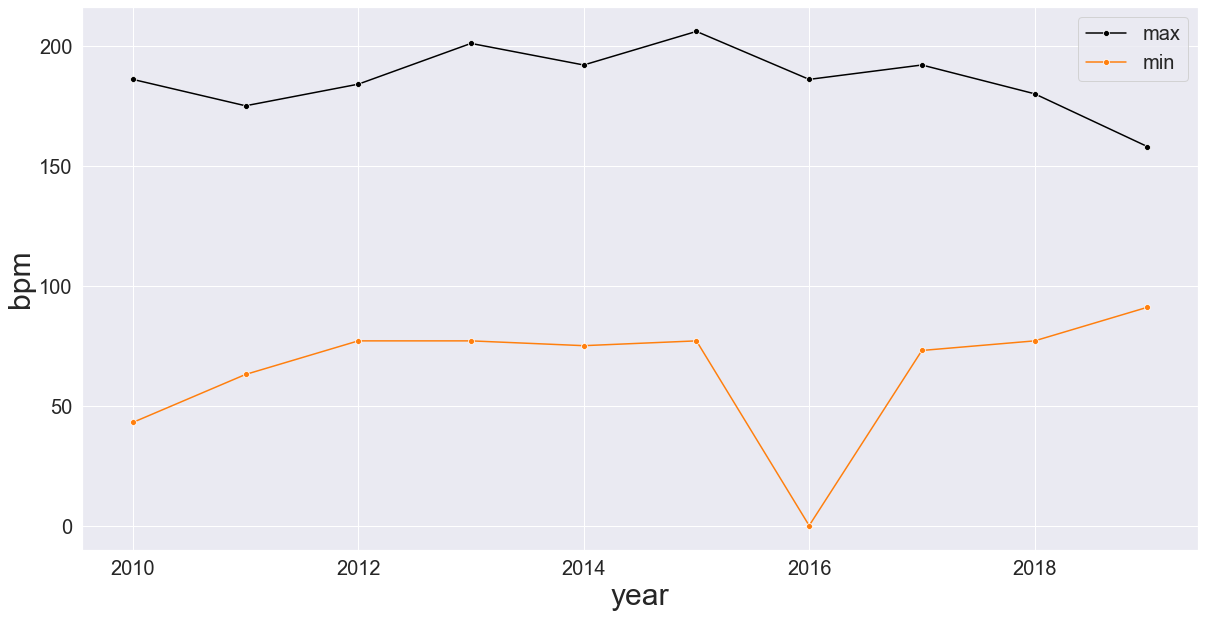

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=maximums, x='year', y='bpm', color='black', marker='o')
sns.lineplot(data=minimums, x='year', y='bpm', color='tab:orange', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('year', fontsize=30)
ax.set_ylabel('bpm', fontsize=30)
plt.legend(labels=['max', 'min'], fontsize=20)
plt.show()

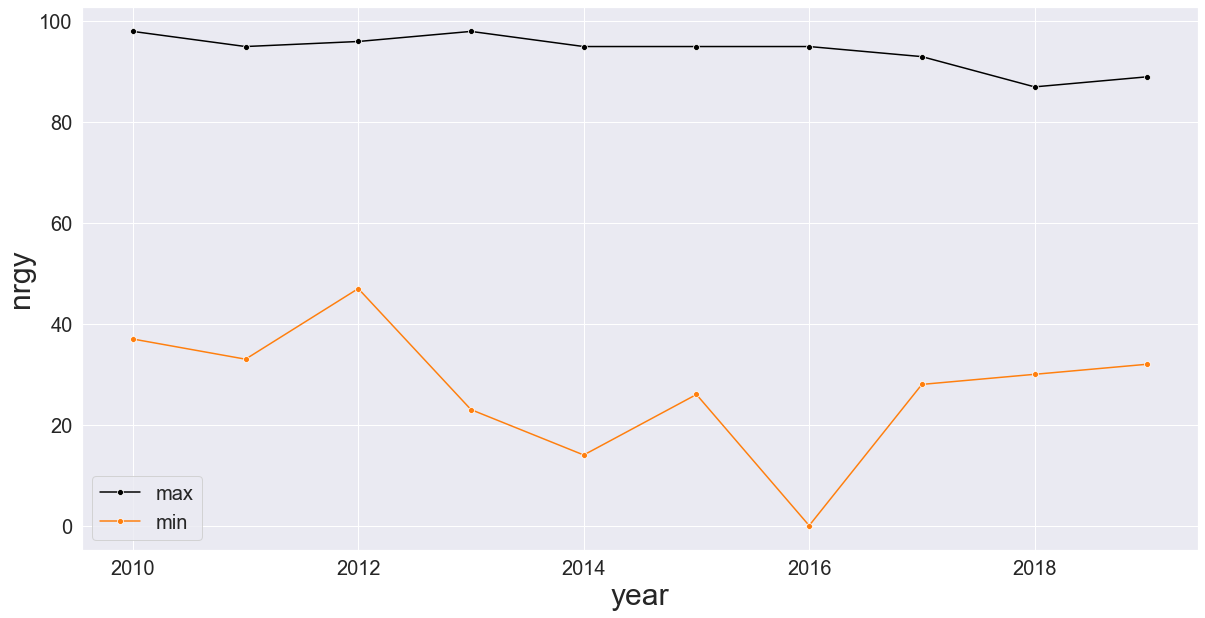

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=maximums, x='year', y='nrgy', color='black', marker='o')
sns.lineplot(data=minimums, x='year', y='nrgy', color='tab:orange', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('year', fontsize=30)
ax.set_ylabel('nrgy', fontsize=30)
plt.legend(labels=['max', 'min'], fontsize=20)
plt.show()

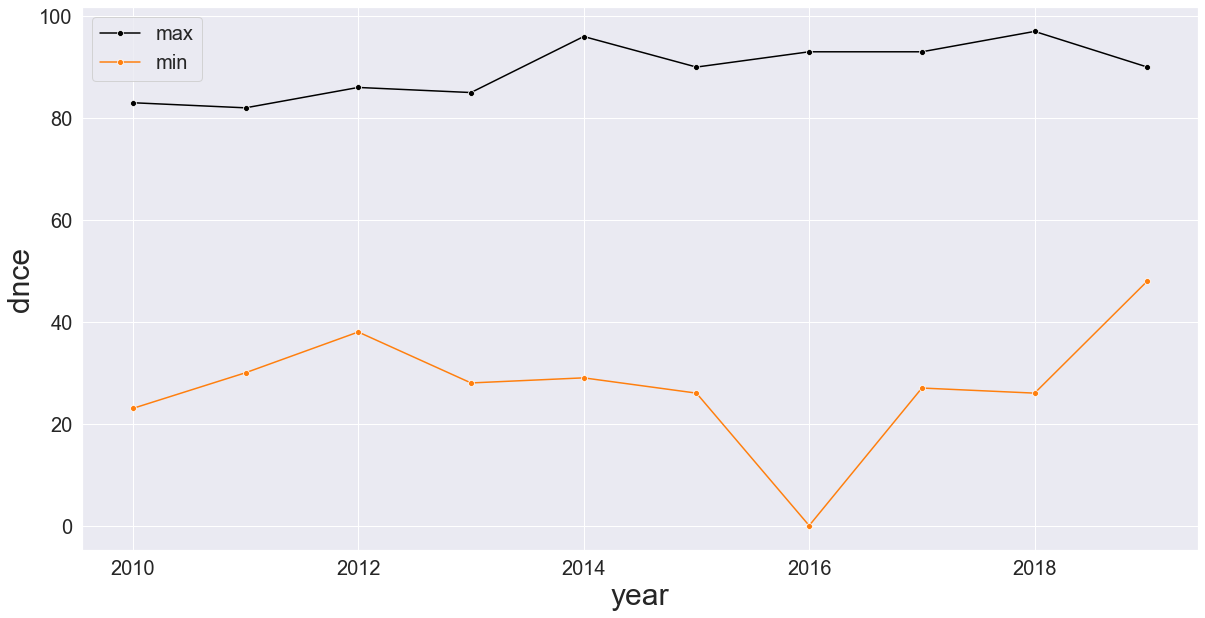

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=maximums, x='year', y='dnce', color='black', marker='o')
sns.lineplot(data=minimums, x='year', y='dnce', color='tab:orange', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('year', fontsize=30)
ax.set_ylabel('dnce', fontsize=30)
plt.legend(labels=['max', 'min'], fontsize=20)
plt.show()

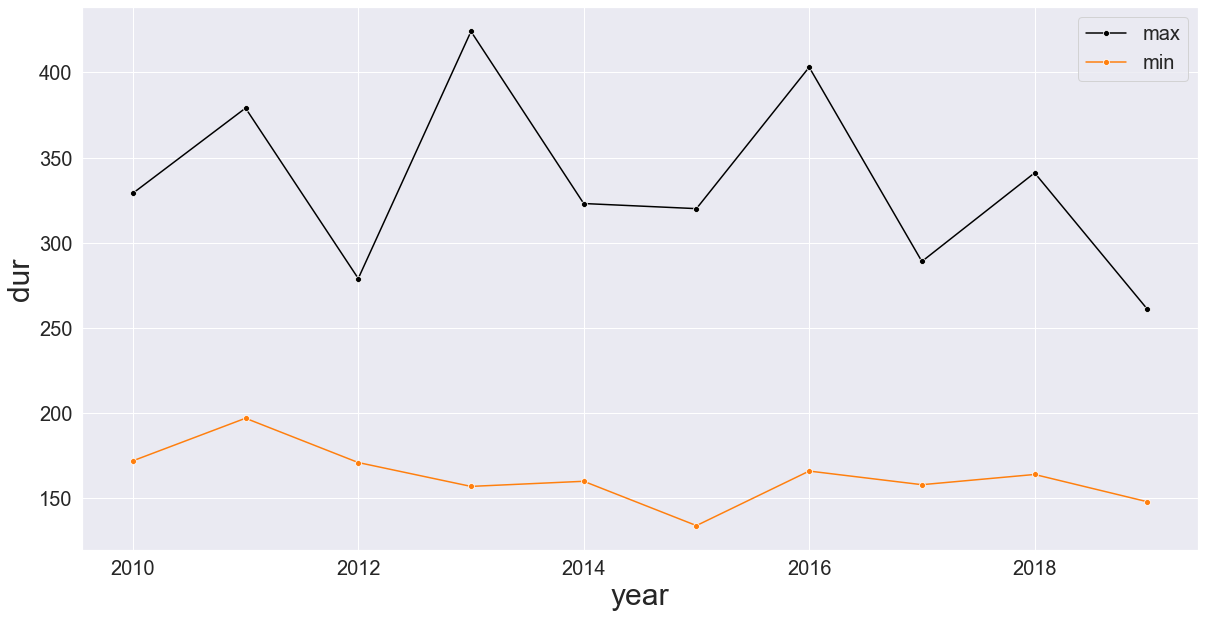

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=maximums, x='year', y='dur', color='black', marker='o')
sns.lineplot(data=minimums, x='year', y='dur', color='tab:orange', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('year', fontsize=30)
ax.set_ylabel('dur', fontsize=30)
plt.legend(labels=['max', 'min'], fontsize=20)
plt.show()

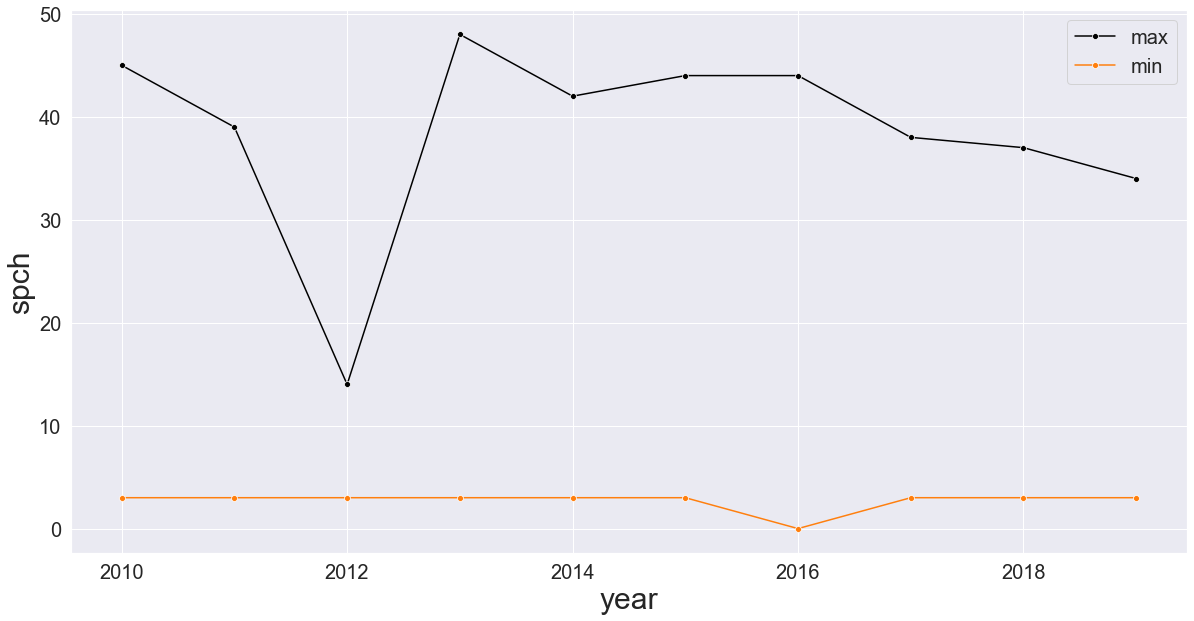

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=maximums, x='year', y='spch', color='black', marker='o')
sns.lineplot(data=minimums, x='year', y='spch', color='tab:orange', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('year', fontsize=30)
ax.set_ylabel('spch', fontsize=30)
plt.legend(labels=['max', 'min'], fontsize=20)
plt.show()

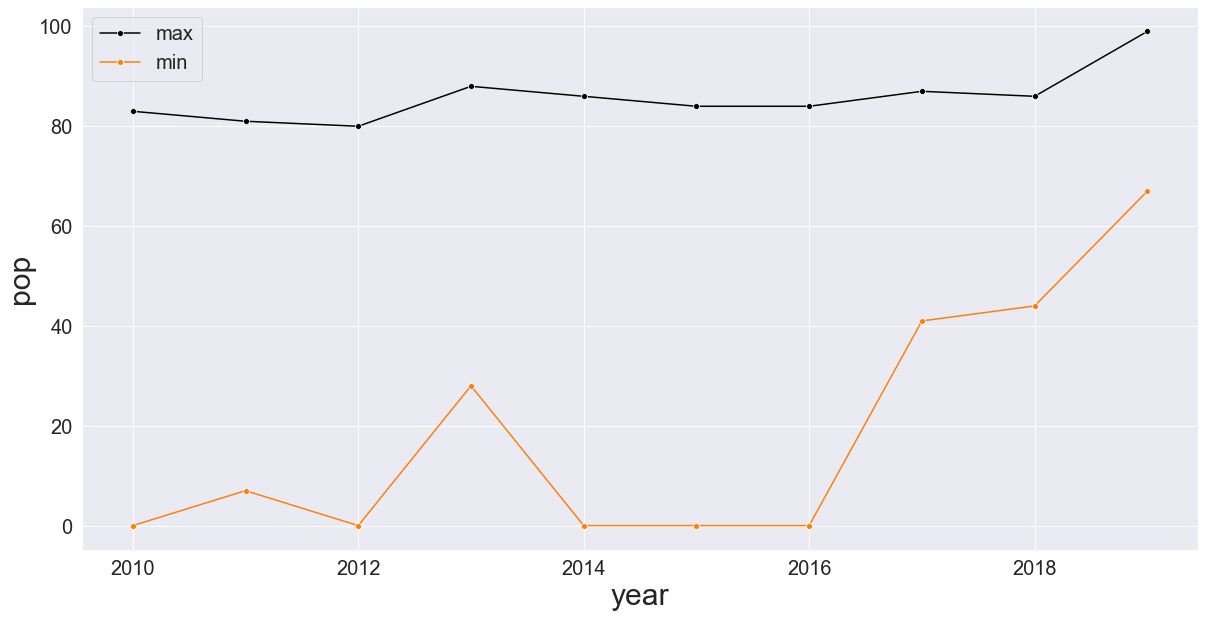

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=maximums, x='year', y='pop', color='black', marker='o')
sns.lineplot(data=minimums, x='year', y='pop', color='tab:orange', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('year', fontsize=30)
ax.set_ylabel('pop', fontsize=30)
plt.legend(labels=['max', 'min'], fontsize=20)
plt.show()

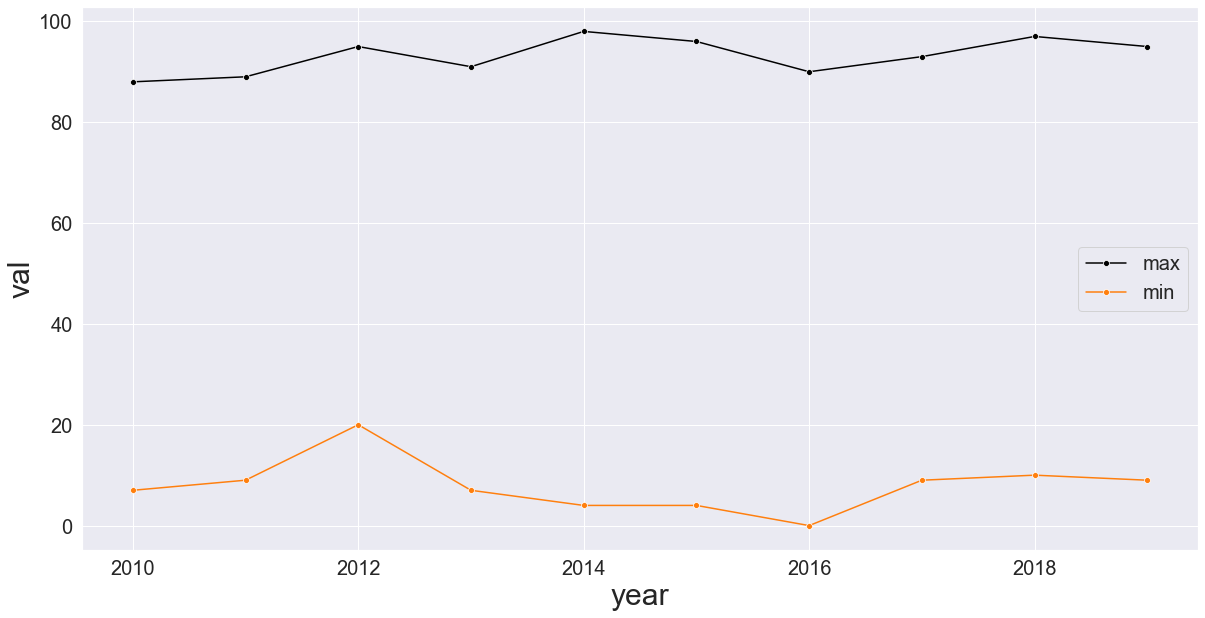

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=maximums, x='year', y='val', color='black', marker='o')
sns.lineplot(data=minimums, x='year', y='val', color='tab:orange', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('year', fontsize=30)
ax.set_ylabel('val', fontsize=30)
plt.legend(labels=['max', 'min'], fontsize=20)
plt.show()

In [30]:
model = LinearRegression()
model

LinearRegression()

In [31]:
iv = ['year', 'bpm', 'nrgy', 'dnce', 'val', 'spch', 'pop']
model.fit(X=df[iv], y=df['dur'])
model.coef_

array([-3.50445713, -0.06405584, -0.21589368, -0.02157644, -0.39217866,
        0.45498132, -0.06969589])

In [20]:
df1 = pd.get_dummies(df['top genre'])
df1.head()

,acoustic pop,alaska indie,alternative r&b,art pop,atl hip hop,australian dance,australian hip hop,australian pop,barbadian pop,baroque pop,belgian edm,big room,boy band,british soul,brostep,canadian contemporary r&b,canadian hip hop,canadian latin,canadian pop,candy pop,celtic rock,chicago rap,colombian pop,complextro,contemporary country,dance pop,danish pop,detroit hip hop,downtempo,edm,electro,electro house,electronic trap,electropop,escape room,folk-pop,french indie pop,hip hop,hip pop,hollywood,house,indie pop,irish singer-songwriter,latin,metropopolis,moroccan pop,neo mellow,permanent wave,pop,tropical house
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [22]:
df1.shape

(603, 50)

In [23]:
df1.sum()

acoustic pop                   2
alaska indie                   1
alternative r&b                1
art pop                        8
atl hip hop                    5
australian dance               6
australian hip hop             1
australian pop                 5
barbadian pop                 15
baroque pop                    2
belgian edm                    2
big room                      10
boy band                      15
british soul                  11
brostep                        2
canadian contemporary r&b      9
canadian hip hop               2
canadian latin                 1
canadian pop                  34
candy pop                      2
celtic rock                    1
chicago rap                    1
colombian pop                  3
complextro                     6
contemporary country           1
dance pop                    327
danish pop                     1
detroit hip hop                2
downtempo                      2
edm                            5
electro   

In [24]:
df['id'] = df.index
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,id
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,1
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,2
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,3
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,4
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,5


In [25]:
df1['id'] = df.index
df1.head()

,acoustic pop,alaska indie,alternative r&b,art pop,atl hip hop,australian dance,australian hip hop,australian pop,barbadian pop,baroque pop,belgian edm,big room,boy band,british soul,brostep,canadian contemporary r&b,canadian hip hop,canadian latin,canadian pop,candy pop,celtic rock,chicago rap,colombian pop,complextro,contemporary country,dance pop,danish pop,detroit hip hop,downtempo,edm,electro,electro house,electronic trap,electropop,escape room,folk-pop,french indie pop,hip hop,hip pop,hollywood,house,indie pop,irish singer-songwriter,latin,metropopolis,moroccan pop,neo mellow,permanent wave,pop,tropical house,id
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5


In [26]:
df_genre = df.merge(df1, on='id')
df_genre.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop_x,id,acoustic pop,alaska indie,alternative r&b,art pop,atl hip hop,australian dance,australian hip hop,australian pop,barbadian pop,baroque pop,belgian edm,big room,boy band,british soul,brostep,canadian contemporary r&b,canadian hip hop,canadian latin,canadian pop,candy pop,celtic rock,chicago rap,colombian pop,complextro,contemporary country,dance pop,danish pop,detroit hip hop,downtempo,edm,electro,electro house,electronic trap,electropop,escape room,folk-pop,french indie pop,hip hop,hip pop,hollywood,house,indie pop,irish singer-songwriter,latin,metropopolis,moroccan pop,neo mellow,permanent wave,pop_y,tropical house
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
df_genre.shape

(603, 65)

In [28]:
df_genre.drop('top genre', axis=1, inplace=True)
df_genre.head()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop_x,id,acoustic pop,alaska indie,alternative r&b,art pop,atl hip hop,australian dance,australian hip hop,australian pop,barbadian pop,baroque pop,belgian edm,big room,boy band,british soul,brostep,canadian contemporary r&b,canadian hip hop,canadian latin,canadian pop,candy pop,celtic rock,chicago rap,colombian pop,complextro,contemporary country,dance pop,danish pop,detroit hip hop,downtempo,edm,electro,electro house,electronic trap,electropop,escape room,folk-pop,french indie pop,hip hop,hip pop,hollywood,house,indie pop,irish singer-songwriter,latin,metropopolis,moroccan pop,neo mellow,permanent wave,pop_y,tropical house
0,"Hey, Soul Sister",Train,2010,97,89,67,-4,8,80,217,19,4,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Love The Way You Lie,Eminem,2010,87,93,75,-5,52,64,263,24,23,82,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TiK ToK,Kesha,2010,120,84,76,-3,29,71,200,10,14,80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bad Romance,Lady Gaga,2010,119,92,70,-4,8,71,295,0,4,79,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Just the Way You Are,Bruno Mars,2010,109,84,64,-5,9,43,221,2,4,78,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 602
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      603 non-null    object
 1   artist                     603 non-null    object
 2   year                       603 non-null    int64 
 3   bpm                        603 non-null    int64 
 4   nrgy                       603 non-null    int64 
 5   dnce                       603 non-null    int64 
 6   dB                         603 non-null    int64 
 7   live                       603 non-null    int64 
 8   val                        603 non-null    int64 
 9   dur                        603 non-null    int64 
 10  acous                      603 non-null    int64 
 11  spch                       603 non-null    int64 
 12  pop_x                      603 non-null    int64 
 13  id                         603 non-null    int64 
 14  acoustic p